## start

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
data_path = 'data/train.csv'
df = pd.read_csv(data_path)
print(df.head())
base_image_dir = 'data/colored_images'
label_mapping = {
    'No_DR': 0,
    'Mild': 1,
    'Moderate': 2,
    'Severe': 3,
    'Proliferate_DR': 4
}

/var/folders/z0/fj8zb5tx55n41y2d0q5pwt480000gn/T/ipykernel_13279/2040900075.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0


In [7]:
images = []
labels = []
img_size=(224,224)
for index, row in df.iterrows():
    for label_name, label_num in label_mapping.items():
        img_dir = os.path.join(base_image_dir, label_name)
        img_path = os.path.join(img_dir, row['id_code'] + '.png')
        if os.path.exists(img_path):
            image = cv2.imread(img_path)
            image = image / 255.0
            images.append(image)
            labels.append(label_num)

images = np.array(images)
labels = np.array(labels)
print (len(images))
print(len(labels))
labels = to_categorical(labels, num_classes=5)

3662
3662


In [10]:
def display(images, num_images=5):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.axis('off')
    plt.show()

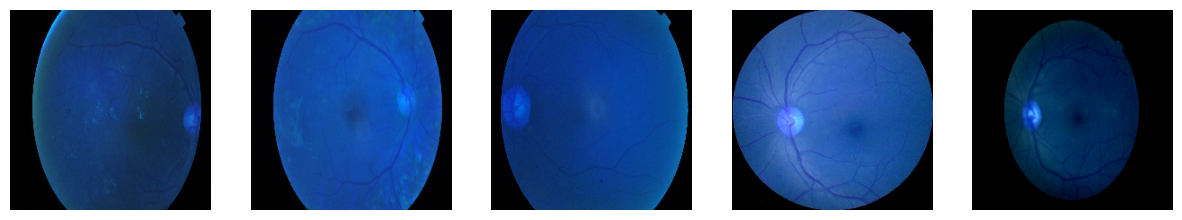

In [4]:
display(images, num_images=5)

In [8]:
x_train_val, x_test, y_train_val, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val=train_test_split(x_train_val, y_train_val, test_size=0.2 ,random_state=42)
print(f"Training data shape: {x_train.shape}")
print(f"Training data shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Training data shape: {y_train.shape}")

Training data shape: (2343, 224, 224, 3)
Training data shape: (2343, 5)
Testing data shape: (733, 224, 224, 3)
Validation data shape: (586, 224, 224, 3)
Training data shape: (2343, 5)


## image preprossecing

In [23]:
def display(images, num_images=5):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.axis('off')
    plt.show()

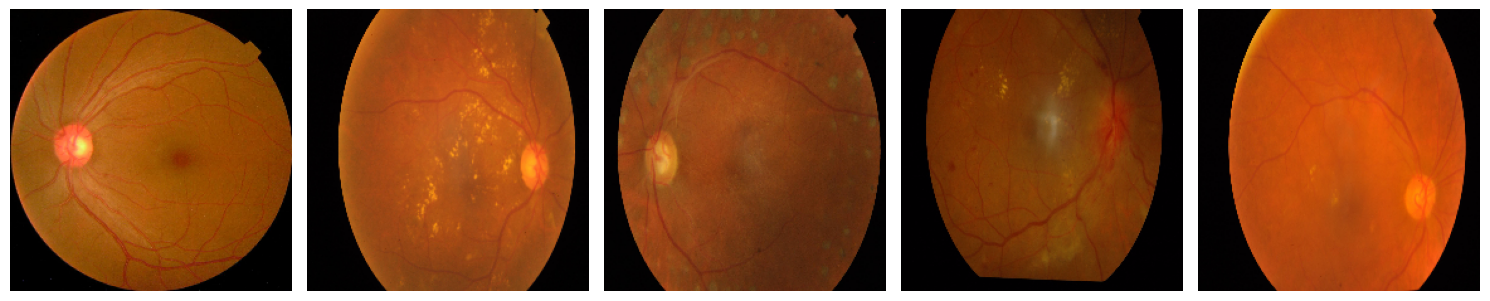

In [24]:
display(x_train)

Original Training data shape: (2343, 224, 224, 3)
Blurred Training data shape: (2343, 224, 224, 3)


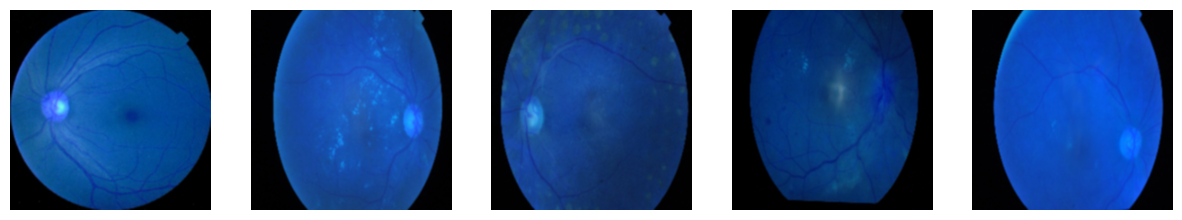

In [5]:
def apply_gaussian_blur(image, kernel_size=(3,3), sigma=0):
    blurred_image=[]
    for image in image:
        img=cv2.GaussianBlur(image, kernel_size, sigma)
        blurred_image.append(img)
    return np.array(blurred_image)
x_train_Gb=apply_gaussian_blur(x_train, kernel_size=(3,3), sigma=0)
x_val_Gb=apply_gaussian_blur(x_val, kernel_size=(3,3), sigma=0)
x_test_Gb=apply_gaussian_blur(x_test, kernel_size=(3,3), sigma=0)

print(f"Original Training data shape: {x_train.shape}")
print(f"Blurred Training data shape: {x_train_Gb.shape}")
index=1
display(x_train_Gb, num_images=5)

Original Training data shape: (2343, 224, 224, 3)
Blurred Training data shape: (2343, 224, 224, 3)


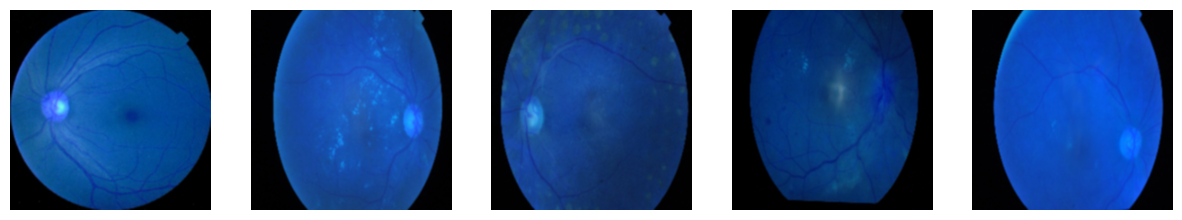

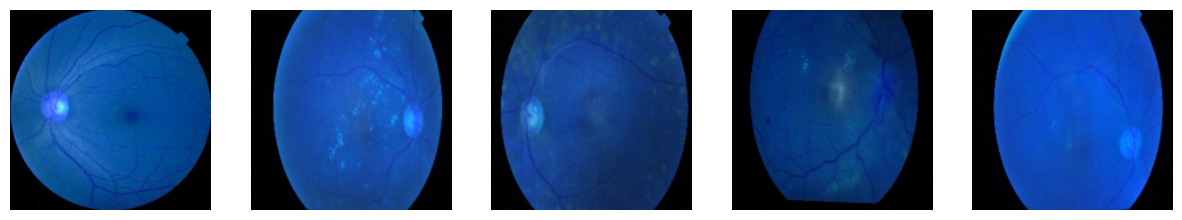

In [6]:
def apply_blend(original_images, blurred_images, alpha=0.5):
    blended_images = []
    for original_image, blurred_image in zip(original_images, blurred_images):
        blended_image = cv2.addWeighted(original_image, 1 - alpha, blurred_image, alpha, 0)
        blended_images.append(blended_image)
    return np.array(blended_images)
x_train_BI=apply_blend(x_train, x_train_Gb, alpha=0.5)
x_val_BI=apply_blend(x_val, x_val_Gb, alpha=0.5)
x_test_BI=apply_blend(x_test, x_test_Gb, alpha=0.5)
print(f"Original Training data shape: {x_train_Gb.shape}")
print(f"Blurred Training data shape: {x_train_BI.shape}")
index=1
display(x_train_Gb,  num_images=5)
display(x_train_BI,  num_images=5)

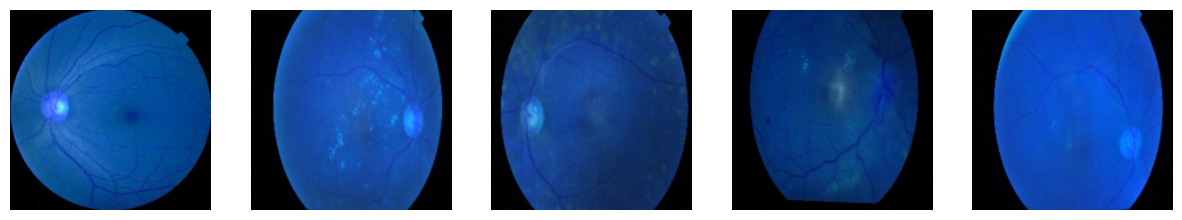

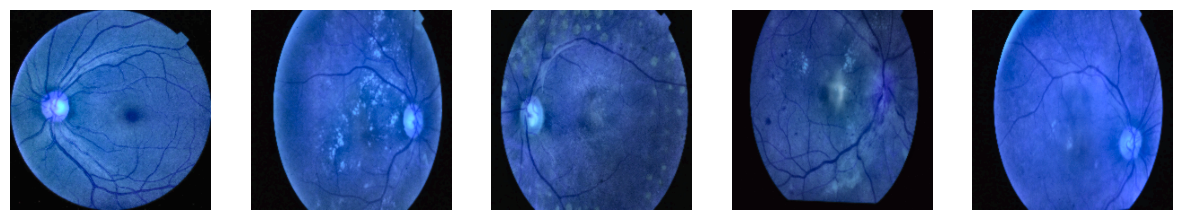

In [7]:
def apply_clahe_rgb(original_images):

    clahe_images = []
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    
    for original_image in original_images:
        if original_image.dtype != np.uint8:
            original_image = np.uint8(original_image * 255)
        lab_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab_image)
        clahe_l = clahe.apply(l)
        clahe_lab = cv2.merge([clahe_l, a, b])
        clahe_rgb = cv2.cvtColor(clahe_lab, cv2.COLOR_LAB2RGB)
        clahe_images.append(clahe_rgb)
    return np.array(clahe_images)
x_train_clahe = apply_clahe_rgb(x_train_BI)
x_val_clahe = apply_clahe_rgb(x_val_BI)
x_test_clahe = apply_clahe_rgb(x_test_BI)
display(x_train_BI, num_images=5)
display(x_train_clahe, num_images=5)

In [8]:
import tensorflow as tf
train_data = tf.data.Dataset.from_tensor_slices((x_train_clahe, y_train))
val_data = tf.data.Dataset.from_tensor_slices((x_val_clahe, y_val))

In [9]:
from sklearn.utils.class_weight import compute_class_weight
def compute_class_weights(y_train):
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(zip(np.unique(y_train), class_weights))
    return class_weight_dict

## model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
def build_cnn_model(input_shape=(224, 224, 3), num_classes=5):
    model = Sequential()
    model.add(Conv2D(8, (3, 3), padding="valid", input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(16, (3, 3), padding="valid", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (4, 4), padding="valid", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.16))
    model.add(Dense(num_classes, activation='softmax')) 
    return model
model = build_cnn_model(input_shape=(224, 224, 3), num_classes=5)
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 51, 51, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 25, 25, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       640,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 650,037 (2.48 MB)

 Trainable params: 649,925 (2.48 MB)

 Non-trainable params: 112 (448.00 B)

In [11]:
train_data = tf.data.Dataset.from_tensor_slices((x_train_clahe, y_train))
val_data = tf.data.Dataset.from_tensor_slices((x_val_clahe, y_val))
test_data = tf.data.Dataset.from_tensor_slices((x_test_clahe, y_test))

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2) 
    image = tf.image.random_crop(image, size=[224, 224, 3])  
    return image, label
train_dataset = train_data.map(augment)
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(32)
val_dataset = val_data.batch(32) 


In [13]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30, 
)


Epoch 1/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 152ms/step - accuracy: 0.3195 - loss: 1.7206 - val_accuracy: 0.6058 - val_loss: 1.1568
Epoch 2/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - accuracy: 0.6162 - loss: 1.0499 - val_accuracy: 0.6741 - val_loss: 0.9160
Epoch 3/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - accuracy: 0.6487 - loss: 0.9528 - val_accuracy: 0.7031 - val_loss: 0.8332
Epoch 4/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 149ms/step - accuracy: 0.6660 - loss: 0.9095 - val_accuracy: 0.7116 - val_loss: 0.7872
Epoch 5/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - accuracy: 0.6839 - loss: 0.8655 - val_accuracy: 0.7270 - val_loss: 0.7608
Epoch 6/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - accuracy: 0.7070 - loss: 0.8378 - val_accuracy: 0.7287 - val_loss: 0.7465
Epoch 7/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 150ms/step - accuracy: 0.7212 - loss: 0.8204 - val_accuracy: 0.7321 - val_loss: 0.7305
Epoch 8/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - accuracy: 0.7157 - loss: 0.8117 - val_accu

In [14]:
y_pred = model.predict(x_test_clahe)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
accuracy = np.sum(y_pred_classes == y_true_classes) / len(y_true_classes) * 100
print(f'Accuracy: {accuracy:.2f}%')

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
Accuracy: 74.08%


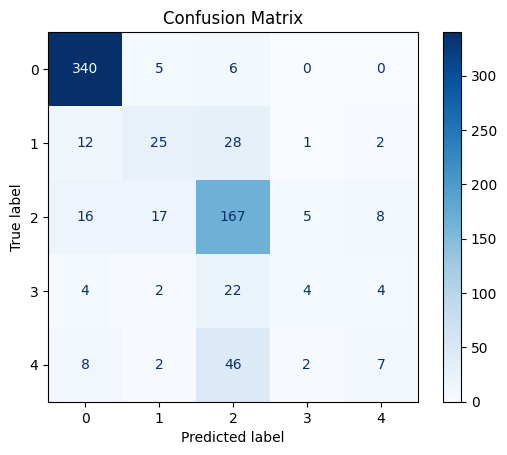

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true_classes))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## model 2

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import cv2
from tensorflow.keras.layers import Input

def build_transfer_learning_model(input_shape=(224, 224, 3), num_classes=5):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  
    x = base_model.output
    x = GlobalAveragePooling2D()(x) 
    x = Dense(1024, activation='relu')(x)  
    x = Dropout(0.5)(x)  
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    return model
transfer_learning_model = build_transfer_learning_model(input_shape=(224, 224, 3), num_classes=5)
transfer_learning_model.compile(optimizer=Adam(learning_rate=1e-5),
                                loss=CategoricalCrossentropy(),
                                metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


In [ ]:
cnn_history = model1.fit(x_train_clahe, y_train, epochs=20, validation_data=(x_val_clahe, y_val))

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 148ms/step - accuracy: 0.4106 - loss: 1.5289 - val_accuracy: 0.6928 - val_loss: 0.9778
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - accuracy: 0.6565 - loss: 0.9357 - val_accuracy: 0.6962 - val_loss: 0.8597
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - accuracy: 0.6849 - loss: 0.8575 - val_accuracy: 0.6911 - val_loss: 0.8216
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - accuracy: 0.6817 - loss: 0.8364 - val_accuracy: 0.6997 - val_loss: 0.8006
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/step - accuracy: 0.7313 - loss: 0.7293 - val_accuracy: 0.6962 - val_loss: 0.7950
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - accuracy: 0.7168 - loss: 0.7574 - val_accuracy: 0.7133 - val_loss: 0.7837
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - accuracy: 0.7442 - loss: 0.7097 - val_accuracy: 0.7133 - val_loss: 0.7761
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - accuracy: 0.7586 - loss: 0.6757 - val_accu

In [ ]:
y_pred = model1.predict(x_test_clahe)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
# Calculate accuracy
accuracy = np.sum(y_pred_classes == y_true_classes) / len(y_true_classes) * 100
print(f'Accuracy: {accuracy:.2f}%')

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Accuracy: 72.58%


In [21]:
transfer_learning_history = transfer_learning_model.fit(x_train_clahe, y_train, epochs=10, validation_data=(x_val_clahe, y_val))

Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.3369 - loss: 1.8189 - val_accuracy: 0.6587 - val_loss: 0.9910
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.5463 - loss: 1.2535 - val_accuracy: 0.7014 - val_loss: 0.8287
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.6214 - loss: 1.0382 - val_accuracy: 0.7133 - val_loss: 0.7543
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.6404 - loss: 0.9772 - val_accuracy: 0.7321 - val_loss: 0.7138
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.6775 - loss: 0.9141 - val_accuracy: 0.7491 - val_loss: 0.6802
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.6895 - loss: 0.8695 - val_accuracy: 0.7577 - val_loss: 0.6516
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 72s 973ms/step - accuracy: 0.7030 - loss: 0.8329 - val_accuracy: 0.7594 - val_loss: 0.6404
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 72s 979ms/step - accuracy: 0.7198 - loss: 0.7672 - val_accuracy: 0.7611 - val

## trans

In [ ]:
y_pred = transfer_learning_model.predict(x_test_clahe)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
accuracy = np.sum(y_pred_classes == y_true_classes) / len(y_true_classes) * 100
print(f'Accuracy: {accuracy:.2f}%')

23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 822ms/step
Accuracy: 75.17%


## trans Extraction

In [161]:
train_transfer_features = transfer_learning_model.predict(x_train_clahe)
val_transfer_features = transfer_learning_model.predict(x_val_clahe)
test_transfer_features = transfer_learning_model.predict(x_test_clahe)

74/74 ━━━━━━━━━━━━━━━━━━━━ 62s 803ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 783ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 811ms/step


## rf

In [248]:
y_train_indices = np.argmax(y_train, axis=1)
y_test_indices = np.argmax(y_test, axis=1)

In [250]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score,recall_score

rf = RandomForestClassifier()
rf.fit(train_transfer_features, y_train)

y_pred_rf = rf.predict(test_transfer_features)

rf_score = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')

print(f'Random Forest Accuracy: {rf_score:.2f}')
print(f'Random Forest Precision (weighted): {rf_precision:.2f}')
print(f'Random Forest F1 Score (weighted): {rf_f1:.2f}')
print(f"Recall: {recall:.2f}")


Random Forest Accuracy: 0.72
Random Forest Precision (weighted): 0.77
Random Forest F1 Score (weighted): 0.73
Recall: 0.72


## svm

In [188]:
y_train_indices = np.argmax(y_train, axis=1)
y_test_indices = np.argmax(y_test, axis=1)

In [211]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score,recall_score

svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(train_transfer_features, y_train_indices)

y_pred_svm = svm_model.predict(test_transfer_features)

y_test = y_test_indices.astype(int) 
y_pred_svm = y_pred_svm.astype(int)

svm_score = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted', zero_division=0)
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_svm, average='weighted')

print(f'SVM Accuracy: {svm_score:.2f}')
print(f'SVM Precision (weighted): {svm_precision:.2f}')
print(f'SVM F1 Score (weighted): {svm_f1:.2f}')
print(f"Recall: {recall:.2f}")


SVM Accuracy: 0.75
SVM Precision (weighted): 0.73
SVM F1 Score (weighted): 0.73
Recall: 0.75


In [219]:
print("Shape of y_test_indices:", y_test_indices.shape)
print("Shape of y_pred:", y_pred_svm.shape)


Shape of y_test_indices: (733,)
Shape of y_pred: (733,)


Confusion Matrix:
[[340   5   6   0   0]
 [ 14  26  27   0   1]
 [ 14  14 172   6   7]
 [  0   0  28   3   5]
 [  1   3  46   3  12]]


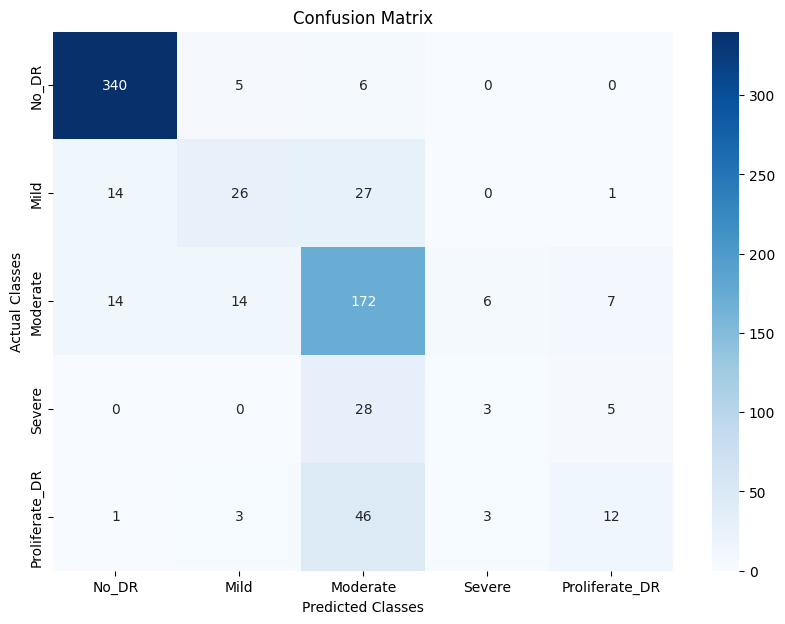

In [220]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test_indices, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR'], yticklabels=['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR'])
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.title("Confusion Matrix")
plt.show()


## knn

In [ ]:
#knn and random forest

In [174]:
y_train_indices = np.argmax(y_train, axis=1)
y_test_indices = np.argmax(y_test, axis=1)

In [233]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score,recall_score

knn_model = KNeighborsClassifier(n_neighbors=5) 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('knn', knn_model),
    ('rf', rf_model)
], voting='soft') 

voting_clf.fit(train_transfer_features, y_train_indices)

y_pred_knn = voting_clf.predict(test_transfer_features)

accuracy = accuracy_score(y_test_indices, y_pred_knn)
precision = precision_score(y_test_indices, y_pred_knn, average='weighted')
f1 = f1_score(y_test_indices, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
print(f'Voting Classifier Accuracy (KNN + Random Forest): {accuracy:.2f}')
print(f'Voting Classifier Precision (weighted): {precision:.2f}')
print(f'Voting Classifier F1 Score (weighted): {f1:.2f}')
print(f"Recall: {recall:.2f}")


Voting Classifier Accuracy (KNN + Random Forest): 0.77
Voting Classifier Precision (weighted): 0.75
Voting Classifier F1 Score (weighted): 0.75
Recall: 0.77


Confusion Matrix:
[[340   4   7   0   0]
 [ 15  32  20   0   1]
 [ 15  16 164   6  12]
 [  0   1  21  11   3]
 [  1   2  36  11  15]]


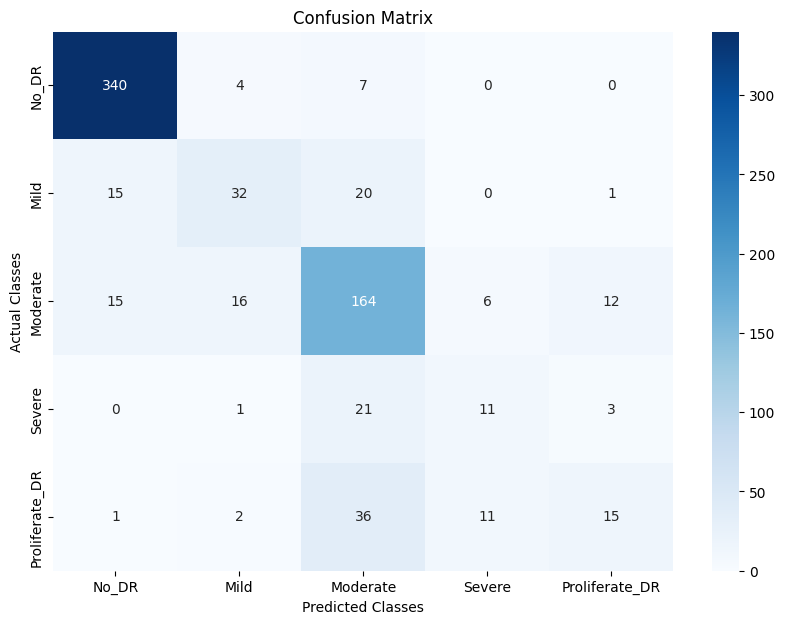

In [221]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test_indices, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR'], yticklabels=['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR'])
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.title("Confusion Matrix")
plt.show()


## boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=50)

ada.fit(train_transfer_features, y_train_indices)

ada_score = ada.score(test_transfer_features, y_test)
print(f"AdaBoost Test Accuracy: {ada_score}")


AdaBoost Test Accuracy: 0.27967257844474763


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', max_depth=6, n_estimators=100)

xgb.fit(train_transfer_features, y_train_indices)

xgb_score = xgb.score(test_transfer_features, y_test)
print(f"XGBoost Test Accuracy: {xgb_score}")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[20:07:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Test Accuracy: 0.7435197817189632


In [251]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', max_depth=6, n_estimators=100)
xgb.fit(train_transfer_features, y_train_indices)

y_pred_xgb = xgb.predict(test_transfer_features)

xgb_score = accuracy_score(y_test_indices, y_pred_xgb)
xgb_precision = precision_score(y_test_indices, y_pred_xgb, average='weighted', zero_division=0)
xgb_f1 = f1_score(y_test_indices, y_pred_xgb, average='weighted', zero_division=0)
xgb_recall = recall_score(y_test_indices, y_pred_xgb, average='weighted')

print(f"XGBoost Test Accuracy: {xgb_score:.2f}")
print(f"XGBoost Precision (weighted): {xgb_precision:.2f}")
print(f"XGBoost F1 Score (weighted): {xgb_f1:.2f}")
print(f"XGBoost Recall (weighted): {xgb_recall:.2f}")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[12:15:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Test Accuracy: 0.74
XGBoost Precision (weighted): 0.73
XGBoost F1 Score (weighted): 0.73
XGBoost Recall (weighted): 0.74


In [215]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score,recall_score

voting_clf = VotingClassifier(estimators=[
    ('ada', ada),
    ('xgb', xgb)
], voting='soft')

voting_clf.fit(train_transfer_features, y_train_indices)

y_pred_b = voting_clf.predict(test_transfer_features)

voting_score = accuracy_score(y_test_indices, y_pred_b)
voting_precision = precision_score(y_test_indices, y_pred_b, average='weighted', zero_division=0)
voting_f1 = f1_score(y_test_indices, y_pred_b, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_b, average='weighted')

print(f"Voting Classifier Test Accuracy: {voting_score:.2f}")
print(f"Voting Classifier Precision (weighted): {voting_precision:.2f}")
print(f"Voting Classifier F1 Score (weighted): {voting_f1:.2f}")
print(f"Recall: {recall:.2f}")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[20:19:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Voting Classifier Test Accuracy: 0.74
Voting Classifier Precision (weighted): 0.72
Voting Classifier F1 Score (weighted): 0.73
Recall: 0.74


Confusion Matrix:
[[334   6   8   3   0]
 [ 15  23  28   1   1]
 [ 13  14 160  12  14]
 [  0   1  20  11   4]
 [  3   3  33  11  15]]


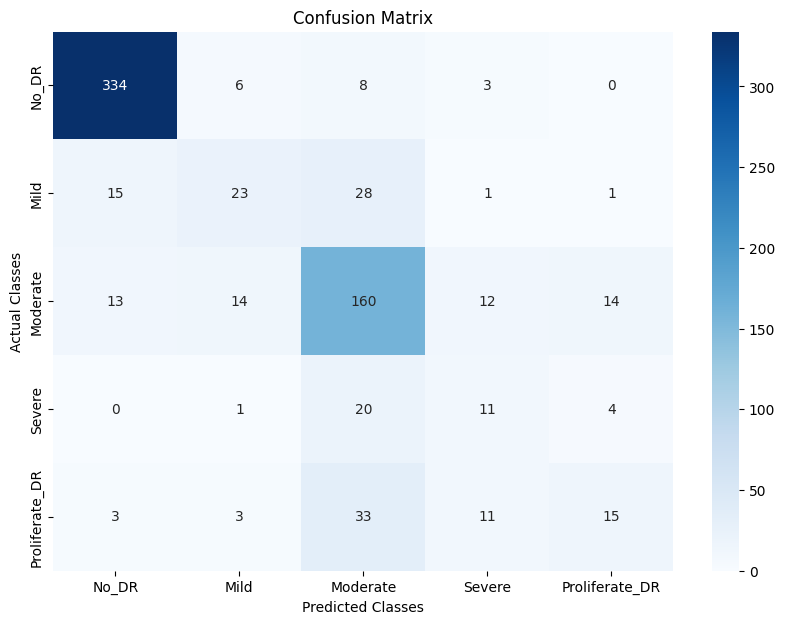

In [222]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test_indices, y_pred_b)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR'], yticklabels=['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR'])
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.title("Confusion Matrix")
plt.show()


## catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score,recall_score
import numpy as np

catboost_model = CatBoostClassifier(
    iterations=1000,
    depth=6,
    learning_rate=0.1,
oss_function='MultiClass',
    verbose=100    l
)

catboost_model.fit(train_transfer_features, y_train_indices)

y_pred_cb = catboost_model.predict(test_transfer_features)

accuracy = accuracy_score(y_test_indices, y_pred_cb)
precision = precision_score(y_test_indices, y_pred_cb, average='weighted', zero_division=0)
f1 = f1_score(y_test_indices, y_pred_cb, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_cb, average='weighted')

print(f"CatBoost Classifier Accuracy: {accuracy:.2f}")
print(f"CatBoost Classifier Precision (weighted): {precision:.2f}")
print(f"CatBoost Classifier F1 Score (weighted): {f1:.2f}")
print(f"Recall: {recall:.2f}")


0:	learn: 1.3951515	total: 8.77ms	remaining: 8.77s
100:	learn: 0.4615640	total: 197ms	remaining: 1.75s
200:	learn: 0.3860767	total: 406ms	remaining: 1.61s
300:	learn: 0.3313034	total: 564ms	remaining: 1.31s
400:	learn: 0.2890695	total: 719ms	remaining: 1.07s
500:	learn: 0.2572695	total: 894ms	remaining: 891ms
600:	learn: 0.2322451	total: 1.06s	remaining: 705ms
700:	learn: 0.2105005	total: 1.22s	remaining: 521ms
800:	learn: 0.1915349	total: 1.38s	remaining: 343ms
900:	learn: 0.1761631	total: 1.53s	remaining: 169ms
999:	learn: 0.1631618	total: 1.69s	remaining: 0us
CatBoost Classifier Accuracy: 0.76
CatBoost Classifier Precision (weighted): 0.74
CatBoost Classifier F1 Score (weighted): 0.74
Recall: 0.76


Confusion Matrix:
[[340   3   7   0   1]
 [ 15  27  25   1   0]
 [ 12  12 163  13  13]
 [  0   1  21  12   2]
 [  1   3  34  14  13]]


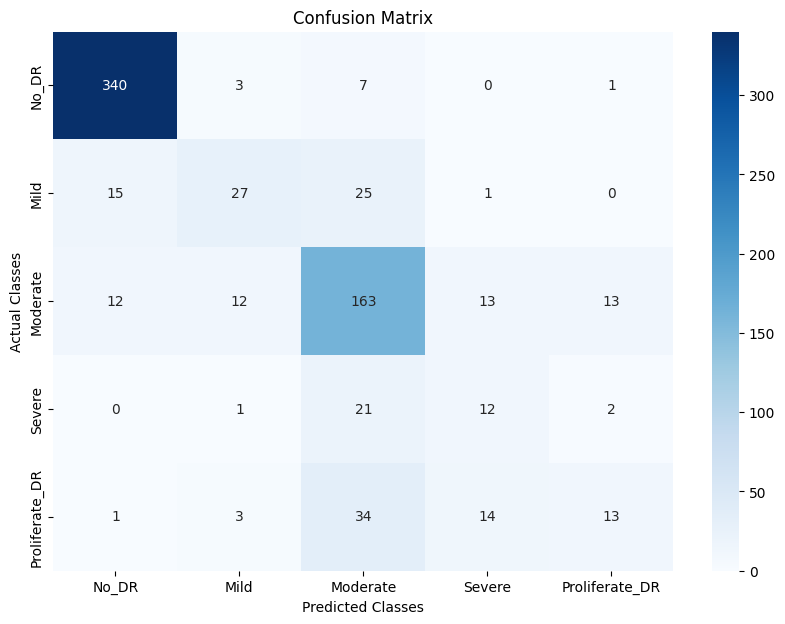

In [223]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test_indices, y_pred_cb)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR'], yticklabels=['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR'])
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.title("Confusion Matrix")
plt.show()


## graph

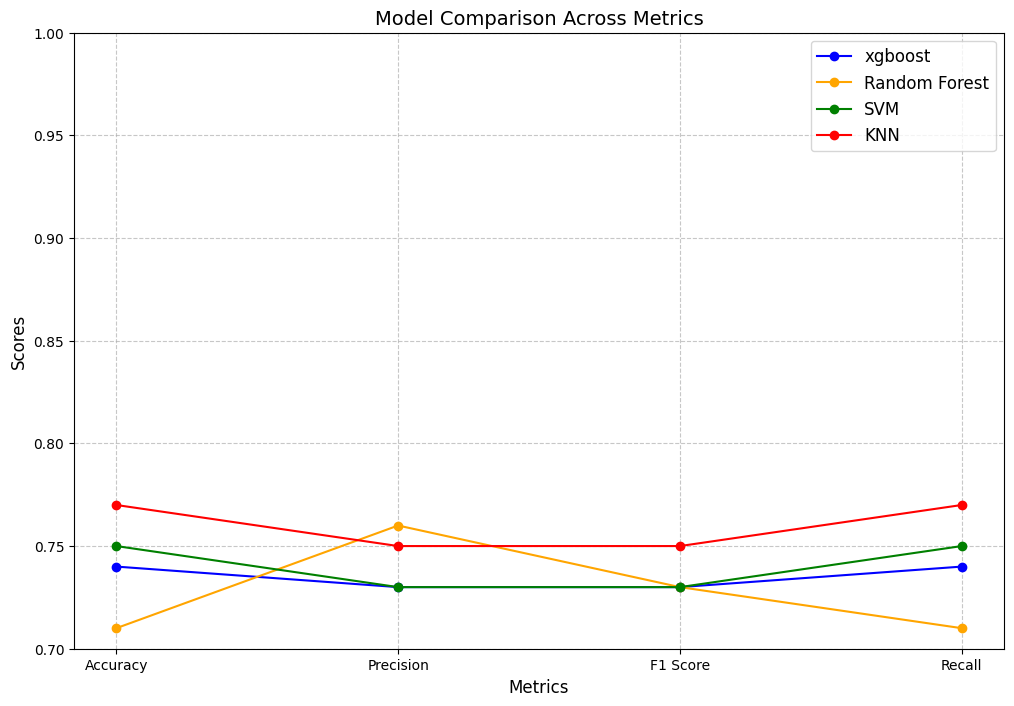

In [253]:
import matplotlib.pyplot as plt

model_names = ['Accuracy', 'Precision', 'F1 Score', 'Recall']
# catboost_metrics = [0.76, 0.74, 0.74, 0.76]
rf_metrics = [0.71, 0.76, 0.73, 0.71]
svm_metrics = [0.75, 0.73, 0.73, 0.75]
knn_metrics = [0.77, 0.75, 0.75, 0.77]
xg_metrics = [0.74, 0.73, 0.73, 0.74]

x = range(len(model_names))

plt.figure(figsize=(12, 8))
plt.plot(x, xg_metrics, marker='o', linestyle='-', label='xgboost', color='blue')
plt.plot(x, rf_metrics, marker='o', linestyle='-', label='Random Forest', color='orange')
plt.plot(x, svm_metrics, marker='o', linestyle='-', label='SVM', color='green')
plt.plot(x, knn_metrics, marker='o', linestyle='-', label='KNN', color='red')
# plt.plot(x, ada_metrics, marker='o', linestyle='-', label='AdaBoost', color='purple')

plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Model Comparison Across Metrics', fontsize=14)
plt.xticks(x, model_names, fontsize=10)
plt.ylim(0.7, 1.0)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()


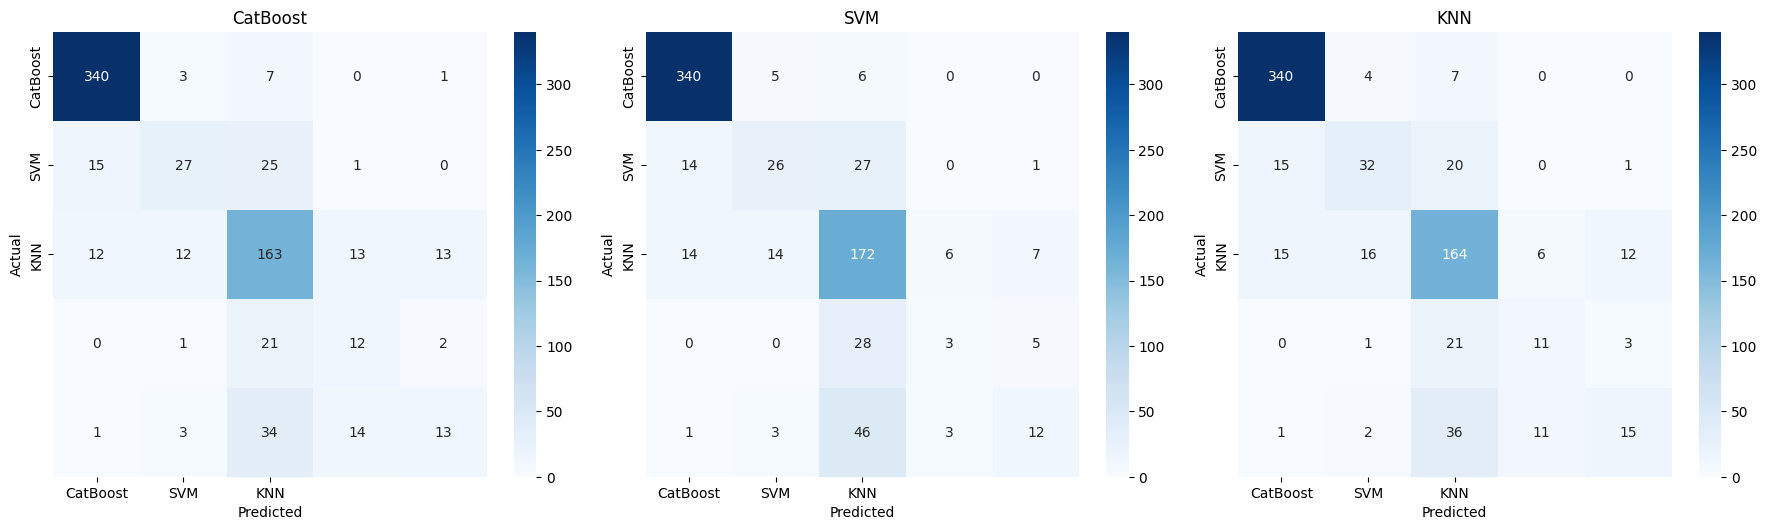

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

cm_cb = confusion_matrix(y_test_indices, y_pred_cb)
cm_svm = confusion_matrix(y_test_indices, y_pred_svm)
cm_knn = confusion_matrix(y_test_indices, y_pred_knn)

models = ['CatBoost', 'SVM', 'KNN']
conf_matrices = [cm_cb, cm_svm, cm_knn]

plt.figure(figsize=(18, 10))
for i in range(len(models)):
    plt.subplot(2, 3, i + 1)
    sns.heatmap(conf_matrices[i], annot=True, fmt='d', cmap='Blues', xticklabels=models, yticklabels=models)
    plt.title(models[i])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()
